<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Общая-информация-о-данных" data-toc-modified-id="Общая-информация-о-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Общая информация о данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Преобразование-типов-данных" data-toc-modified-id="Преобразование-типов-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Преобразование типов данных</a></span></li><li><span><a href="#Работа-с-дубликатами" data-toc-modified-id="Работа-с-дубликатами-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Работа с дубликатами</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Сравнение-портретов-клиентов-(отточные/неотточные)-по-признакам:" data-toc-modified-id="Сравнение-портретов-клиентов-(отточные/неотточные)-по-признакам:-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Сравнение портретов клиентов (отточные/неотточные) по признакам:</a></span></li><li><span><a href="#Изучение-количественных-признаков-оттока:" data-toc-modified-id="Изучение-количественных-признаков-оттока:-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Изучение количественных признаков оттока:</a></span></li><li><span><a href="#Уровни-оттока-по-категориям:" data-toc-modified-id="Уровни-оттока-по-категориям:-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Уровни оттока по категориям:</a></span></li><li><span><a href="#Корреляционный-анализ" data-toc-modified-id="Корреляционный-анализ-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Корреляционный анализ</a></span></li></ul></li><li><span><a href="#Статистический-анализ" data-toc-modified-id="Статистический-анализ-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Статистический анализ</a></span></li><li><span><a href="#Промежуточные-итоги" data-toc-modified-id="Промежуточные-итоги-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Промежуточные итоги</a></span></li><li><span><a href="#Сегментация" data-toc-modified-id="Сегментация-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Сегментация</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Банки — Анализ оттока клиентов

Ссылка на презентацию: https://docs.google.com/presentation/d/1cD8KCCblPdo6fivfAwrbUmWkDhBx_IHk/edit?usp=sharing&ouid=100080907338105418525&rtpof=true&sd=true

**Цель:** Проанализировать клиентов регионального банка и выделить сегменты клиентов,
которые склонны уходить из банка.

**Задачи:**
1. Провести исследовательский анализ данных, определить все значимые признаки отточности.

2. Сформулировать и проверить статистические гипотезы.

3. Объединяя признаки отточности, сформировать сегменты и дать по ним рекомендации.


Описание данных:

Описание датасетов
/datasets/bank_scrooge.csv
Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в
Ярославле и областных городах: Ростов Великий и Рыбинск.
Колонки:

- USERID — идентификатор пользователя;
- score — баллы кредитного скоринга;
- city — город;
- gender — пол;
- age — возраст;
- equity — количество баллов собственности;
- balance — баланс на счёте;
- products — количество продуктов, которыми пользуется клиент;
- credit_card — есть ли кредитная карта;
- last_activity — активный клиент;
- EST_SALARY — оценочный доход клиента;
- сhurn — признак оттока.

### Общая информация о данных

Загрузка данных и вывод первых строк набора данных. Изучение общей информации о датафрейме.

In [1]:
pip install phik

     |████████████████████████████████| 686 kB 1.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as mth
from scipy import stats as st
pd.options.mode.chained_assignment = None


In [3]:
import phik

In [4]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')
df.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [6]:
df.describe()

,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.00000,10000.000000,9974.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,171814.71260,848.699400,42.734409,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000
std,33708.23812,65.448519,12.179971,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864
min,94561.00000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142810.25000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,172728.00000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,201261.75000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000
max,229145.00000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


In [7]:
df = df.rename(columns={'USERID': 'user_id', 'EST_SALARY': 'est_salary'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  est_salary     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


В столбце products минимальное кол-во используемых продуктов - 0. Если пользователь является действующим клиентом банка, то у него должен быть, как минимум, один продукт, например, вклад, дебетовая карта. 

In [8]:
df.loc[df['products'] == 0]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8957,147837,962.0,Рыбинск,Ж,79.0,3,NaN,0,0,0,25063.96,1


In [9]:
new_df = df.loc[~(df['products'] == 0)]
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9999 non-null   int64  
 1   score          9999 non-null   float64
 2   city           9999 non-null   object 
 3   gender         9999 non-null   object 
 4   age            9973 non-null   float64
 5   equity         9999 non-null   int64  
 6   balance        7705 non-null   float64
 7   products       9999 non-null   int64  
 8   credit_card    9999 non-null   int64  
 9   last_activity  9999 non-null   int64  
 10  est_salary     9999 non-null   float64
 11  churn          9999 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 1015.5+ KB


Представлено 10000 строк с данными о пользователях банка. Привели наименования столбцов к snake_case. В двух столбцах обнаружены пропуски. Необходимо скорректировать тип данных в столбце age на int, в остальных столбцах типы данных корректные. Предварительно по данным не наблюдаются аномалии, только по признаку оценочного дохода есть достаточное различие среднего и медианы, что указывает на выбросы и скошенность распределения, рассмотрим это далее по проекту. Также, удалили строку с 0 количетсвом продуктов, что невозможно у действующих пользователей банка. Далее будем работать с обновленным датафреймом new_df и все изменения производить уже в нем. 

### Предобработка данных

#### Обработка пропусков

Изучение взаимосвязи наличия пропусков с данными

In [10]:
new_df.isna().sum().sort_values(ascending=False)

balance          2294
age                26
user_id             0
score               0
city                0
gender              0
equity              0
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

In [11]:
(new_df.isna().sum() / len(new_df) *100).sort_values(ascending=False)

balance          22.942294
age               0.260026
user_id           0.000000
score             0.000000
city              0.000000
gender            0.000000
equity            0.000000
products          0.000000
credit_card       0.000000
last_activity     0.000000
est_salary        0.000000
churn             0.000000
dtype: float64

In [12]:
new_df.loc[new_df['age'].isna()]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1247,228075,932.0,Ярославль,М,NaN,5,7601719.20,2,1,1,408121.16,0
2165,187635,692.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.82,0
2444,221156,913.0,Ярославль,М,NaN,0,NaN,1,1,1,135693.24,0
3091,138660,836.0,Ростов,Ж,NaN,5,294315.53,2,0,1,63310.22,1
4912,210674,834.0,Рыбинск,М,NaN,1,238330.52,2,0,1,93775.06,0
5470,218868,827.0,Рыбинск,Ж,NaN,4,448959.07,2,1,1,67835.95,0
5495,151662,884.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,137500.77,0
7236,210135,908.0,Рыбинск,Ж,NaN,4,1120340.31,3,1,1,85002.15,0
7248,219343,920.0,Рыбинск,Ж,NaN,0,NaN,1,1,0,159248.67,0
7345,184913,829.0,Ярославль,Ж,NaN,3,188648.77,2,0,1,75206.90,0


In [13]:
new_df = new_df.dropna(subset=['age'])
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9973 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9973 non-null   int64  
 1   score          9973 non-null   float64
 2   city           9973 non-null   object 
 3   gender         9973 non-null   object 
 4   age            9973 non-null   float64
 5   equity         9973 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9973 non-null   int64  
 8   credit_card    9973 non-null   int64  
 9   last_activity  9973 non-null   int64  
 10  est_salary     9973 non-null   float64
 11  churn          9973 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 1012.9+ KB


Поскольку пропусков в столбце age немного, удалили данные строки. Поскольку данные пропуски не зависят от других переменных и не ведут к смещениям, можем отнести их типу пропуска MCAR - missing completely at random.

Касаемо столбца balance, исследуем природу пропусков и сравним, изменятся ли значения в остальных признаках при удалении пропусков.Cоздадим отдельный столбец со значениями 1/0 в зависимости от того, есть пропуск в в строке или нет.

In [14]:
new_df['balance_is_null'] = new_df['balance'].isna()
new_df['balance_is_null'] = new_df['balance_is_null'].astype('int')

In [15]:
new_df.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_is_null
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,0
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,1
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,0
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,0


In [16]:
df_pivot = new_df.pivot_table(index='balance_is_null',\
               aggfunc={'age': ['median', 'mean'],'est_salary': ['median', 'mean'], \
               'products': 'median', 'equity': 'median'}).reset_index()
df_pivot

balance_is_null        age        equity     est_salary             products
                        mean median median           mean      median   median
0               0  42.924366   40.0      4  124520.394264  106250.180        2
1               1  42.076822   40.0      0  226433.776313  174354.235        1

In [17]:
df_pivot.columns = ['_'.join([str(i).strip() for i in col if i]) for col in df_pivot.columns]
df_pivot

,balance_is_null,age_mean,age_median,equity_median,est_salary_mean,est_salary_median,products_median
0,0,42.924366,40.0,4,124520.394264,106250.180,2
1,1,42.076822,40.0,0,226433.776313,174354.235,1


Поскольку показатели других признаков меняются (например, медианное значение кол-ва объектов собственности, и кол-ва  используемых продуктов,  средний и медианный доход), заполнять пропуски заглушками или удалять не будем. Пропуски стоит отнести к типу MNAR - missing not at random.

#### Преобразование типов данных 

в том числе добавление дополнительных столбцов, если необходимо (напр, кодирование столбца с городами через get_dummies путем создания отдельного признака. )

В целом, типы данных соответсвуют необходимым, переведем только age и score к int.

In [18]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9973 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          9973 non-null   int64  
 1   score            9973 non-null   float64
 2   city             9973 non-null   object 
 3   gender           9973 non-null   object 
 4   age              9973 non-null   float64
 5   equity           9973 non-null   int64  
 6   balance          7695 non-null   float64
 7   products         9973 non-null   int64  
 8   credit_card      9973 non-null   int64  
 9   last_activity    9973 non-null   int64  
 10  est_salary       9973 non-null   float64
 11  churn            9973 non-null   int64  
 12  balance_is_null  9973 non-null   int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 1.3+ MB


In [19]:
new_df['age'] = new_df['age'].astype('int')
new_df['score'] = new_df['score'].astype('int')
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9973 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          9973 non-null   int64  
 1   score            9973 non-null   int64  
 2   city             9973 non-null   object 
 3   gender           9973 non-null   object 
 4   age              9973 non-null   int64  
 5   equity           9973 non-null   int64  
 6   balance          7695 non-null   float64
 7   products         9973 non-null   int64  
 8   credit_card      9973 non-null   int64  
 9   last_activity    9973 non-null   int64  
 10  est_salary       9973 non-null   float64
 11  churn            9973 non-null   int64  
 12  balance_is_null  9973 non-null   int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 1.3+ MB


Для дальнейшей работы создадим отдельные столбцы со значениями True/False по городам и бинарным представлением категорийной переменной пола, где 1 - мужской пол, а 0 - женский.

In [20]:
new_df.city.unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

In [21]:
new_df[['rostov', 'rybinsk', 'yaroslavl']] = pd.get_dummies(new_df['city'])
new_df.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_is_null,rostov,rybinsk,yaroslavl
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,0,0,1,0
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,0,0,1,0
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,1,0,1,0
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,0,0,0,1
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,0,0,0,1


In [22]:
new_df['gender'].unique()

array(['Ж', 'М'], dtype=object)

In [23]:
new_df['gender_nums'] = pd.get_dummies(new_df['gender'], drop_first=True)
new_df.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_is_null,rostov,rybinsk,yaroslavl,gender_nums
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,0,0,1,0,0
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,0,0,1,0,0
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,1,0,1,0,0
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,0,0,0,1,0
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,0,0,0,1,1


#### Работа с дубликатами
Обработка явных и неявных дубликатов, проверка данных, удаление их, если необходимо

In [24]:
new_df.duplicated().sum()

0

Явных дубликатов нет

In [25]:
res = new_df.user_id.value_counts().to_frame()
result = res.loc[res['user_id'] == 2].index.tolist()
len(result)

50

In [26]:
new_df.loc[new_df['user_id'].isin(result)].sort_values(by='user_id')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_is_null,rostov,rybinsk,yaroslavl,gender_nums
1893,116540,883,Рыбинск,Ж,55,1,362756.49,3,0,1,175920.48,1,0,0,1,0,0
7694,116540,887,Ярославль,Ж,38,0,NaN,1,0,1,119247.61,0,1,0,0,1,0
4866,117943,855,Рыбинск,Ж,32,6,1036832.93,4,1,1,107792.71,1,0,0,1,0,0
7542,117943,880,Ярославль,Ж,40,0,NaN,1,1,0,137718.93,0,1,0,0,1,0
5863,120258,908,Рыбинск,Ж,38,4,2213581.63,2,0,1,160327.77,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2302,220816,934,Рыбинск,Ж,74,5,1294285.39,3,1,0,95606.80,0,0,0,1,0,0
2597,226719,990,Ярославль,М,37,4,14648692.14,2,0,0,934412.61,1,0,0,0,1,1
4216,226719,903,Рыбинск,Ж,63,0,NaN,1,1,0,138582.58,0,1,0,1,0,0
8205,227795,840,Рыбинск,М,34,2,350768.03,1,1,0,102036.14,1,0,0,1,0,1


Проверили датафрейм на неявные дубликаты и обнаружили 73 user_id, которые повторяются. При ознакомлении с данными, видно, что несмотря на одинаковый user_id, сильно различаются все остальные признаки. Поскольку остальные признаки сильно различаются, оставим их.

In [27]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9973 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          9973 non-null   int64  
 1   score            9973 non-null   int64  
 2   city             9973 non-null   object 
 3   gender           9973 non-null   object 
 4   age              9973 non-null   int64  
 5   equity           9973 non-null   int64  
 6   balance          7695 non-null   float64
 7   products         9973 non-null   int64  
 8   credit_card      9973 non-null   int64  
 9   last_activity    9973 non-null   int64  
 10  est_salary       9973 non-null   float64
 11  churn            9973 non-null   int64  
 12  balance_is_null  9973 non-null   int64  
 13  rostov           9973 non-null   uint8  
 14  rybinsk          9973 non-null   uint8  
 15  yaroslavl        9973 non-null   uint8  
 16  gender_nums      9973 non-null   uint8  
dtypes: float64(2),

В данном разделе мы скорректировали типы данных столбцов age и score. Удалили часть пропусков, которые относились к столбцу age, т.к. этих пропусков было мало и они не влияли на другие признаки. Явные дубликаты не обнаружены, неявные дубликаты по столбцу user_id сохранили, т.к. значения признаков сильно разнятся. Также мы закодировали часть признаков для удобной последующей работы. Далее будем работать с обновленным датафреймом new_df.

### Исследовательский анализ данных

Все процедуры дополнить соответствующими визуализациями

#### Сравнение портретов клиентов (отточные/неотточные) по признакам:

Сравнение подходящих мер центральной тенденции по представленным пунктам.

- баллы кредитного скоринга

In [28]:
new_df.loc[new_df['churn'] == 1]['score'].describe()

count    1818.000000
mean      863.361936
std        49.580696
min       706.000000
25%       828.000000
50%       866.000000
75%       898.000000
max      1000.000000
Name: score, dtype: float64

In [29]:
new_df.loc[new_df['churn'] == 0]['score'].describe()

count    8155.000000
mean      845.396199
std        67.993107
min       642.000000
25%       796.000000
50%       848.000000
75%       900.000000
max      1000.000000
Name: score, dtype: float64

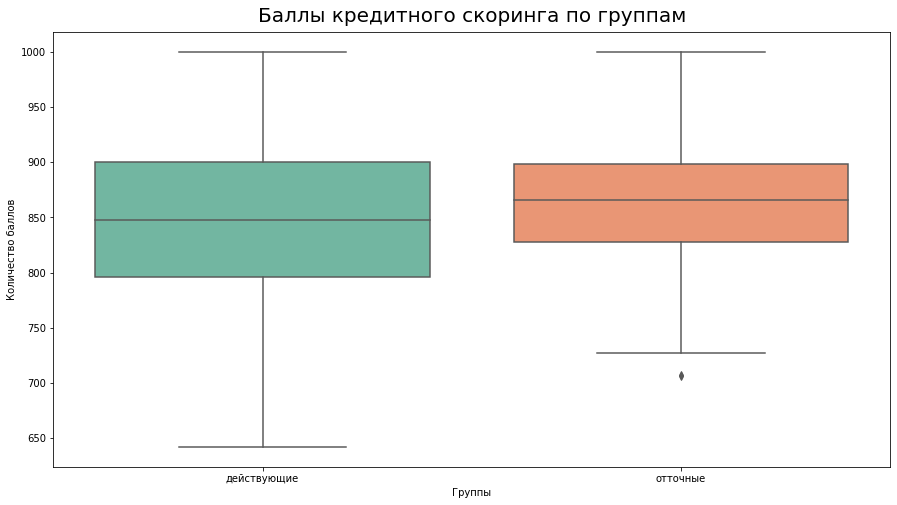

In [30]:
sns.set_palette("Set2")
plt.figure(figsize=(15, 8))
sns.boxplot(x='churn', y='score', data=new_df)
plt.title('Баллы кредитного скоринга по группам', fontsize=20, pad=10)
plt.xlabel('Группы')
plt.ylabel('Количество баллов')

x_labels = ['действующие', 'отточные'] 
x_ticks = [0, 1]
#add x-axis values to plot
plt.xticks (ticks=x_ticks, labels=x_labels)
# отображаем график на экране
plt.show()

In [31]:
perc_25 = np.percentile(new_df.loc[new_df['churn'] == 1]['score'], 25)
perc_75 = np.percentile(new_df.loc[new_df['churn'] == 1]['score'], 75)
IQR = perc_75 - perc_25
IQR

70.0

In [32]:
score_df = new_df.loc[new_df['churn'] == 1]
score_df.loc[score_df['score'] <= perc_25 - 1.5*IQR]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_is_null,rostov,rybinsk,yaroslavl,gender_nums
1400,146876,707,Ярославль,М,24,0,NaN,3,1,0,94091.11,1,1,0,0,1,1
3329,226723,706,Ярославль,М,53,3,387337.5,1,1,1,17162.90,1,0,0,0,1,1


В группе оттока по ящику с усами видим 2 выброса, поскольку таких данных мало, оставляем их. Данные между отточными и текущими клиентами банка не сильно отличаются изначально, выбросы не оказывают сильного влияния.

In [33]:
piv = new_df.pivot_table(index='churn', aggfunc={'score': ['mean', 'median']}).reset_index()
piv.columns = ['_'.join([str(i).strip() for i in col if i]) for col in piv.columns]
piv = piv.set_index('churn').T
piv.columns=['0', '1']
piv

,0,1
score_mean,845.396199,863.361936
score_median,848.000000,866.000000


In [34]:
piv['difference_perc'] = (piv['1'] / piv['0']) -1
piv.iloc[1]['difference_perc'] = 0
piv
piv.style.format({'difference_perc': '{:.2%}'})

,0,1,difference_perc
score_mean,845.396199,863.361936,2.13%
score_median,848.000000,866.000000,2.12%


Баллы кредитного скоринга между отточными и неотточными клиентами различаются примерно на 2%

- возраст

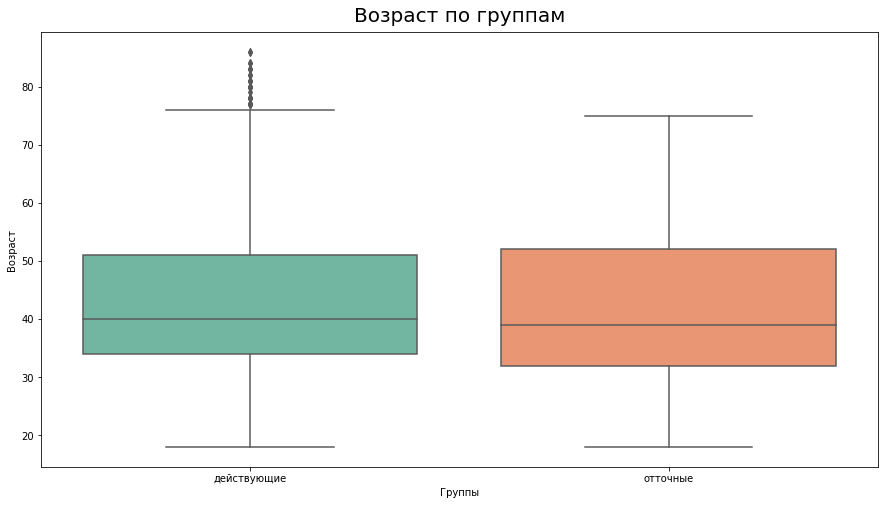

In [35]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='churn', y='age', data=new_df)
plt.title('Возраст по группам', fontsize=20, pad=10)
plt.xlabel('Группы')
plt.ylabel('Возраст')

x_labels = ['действующие', 'отточные'] 
x_ticks = [0, 1]
#add x-axis values to plot
plt.xticks (ticks=x_ticks, labels=x_labels)
# отображаем график на экране
plt.show()

In [36]:
piv = new_df.pivot_table(index='churn', aggfunc={'age': ['mean', 'median']}).reset_index()
piv.columns = ['_'.join([str(i).strip() for i in col if i]) for col in piv.columns]
piv = piv.set_index('churn').T
piv.columns=['0', '1']
piv['difference_perc'] = (piv['1'] / piv['0']) -1
piv.style.format({'difference_perc': '{:.2%}'})

,0,1,difference_perc
age_mean,43.020846,41.429593,-3.70%
age_median,40.000000,39.000000,-2.50%


Средний возраст отточной группы на 3,7% меньше, медиана и среднее не сильно отличаются по группам. 

- пол

In [37]:
piv = new_df.pivot_table(index='churn', aggfunc={'gender': [pd.Series.mode, 'count']}).reset_index()
piv.columns = ['_'.join([str(i).strip() for i in col if i]) for col in piv.columns]
piv = piv.set_index('churn').T
piv.columns=['0', '1']
piv

,0,1
gender_count,8155,1818
gender_mode,Ж,М


In [38]:
piv = new_df.pivot_table(index='gender', columns='churn', aggfunc={'gender': 'count'}).reset_index()
piv.columns = ['gender', 'churn_0', 'churn_1']
piv = piv.set_index('gender').T
piv['percent_of_women'] = piv['Ж'] / (piv['Ж'] + piv['М'])
piv['percent_of_men'] = piv['М'] / (piv['Ж'] + piv['М'])
piv.style.format({'percent_of_women': '{:.2%}', 'percent_of_men': '{:.2%}'})

gender,Ж,М,percent_of_women,percent_of_men
churn_0,4347,3808,53.30%,46.70%
churn_1,635,1183,34.93%,65.07%


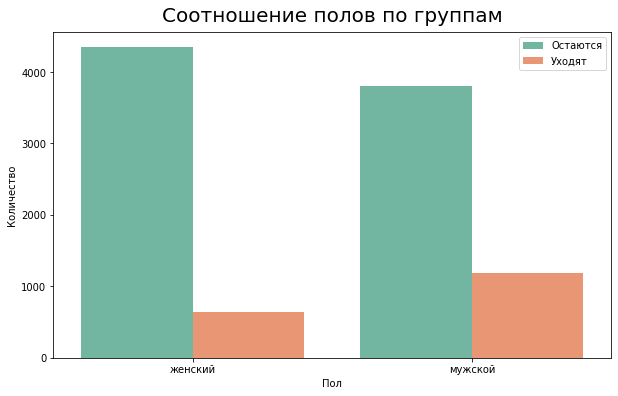

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(x='gender_nums', data=new_df, hue='churn')
plt.legend(labels=['Остаются', 'Уходят'])
x_labels = ['женский', 'мужской'] 
x_ticks = [0, 1]
#add x-axis values to plot
plt.xticks (ticks=x_ticks, labels=x_labels)
plt.title('Соотношение полов по группам', fontsize=20, pad=10)
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.show()

В группе действующих клиентов преобладают женщины, а в группе отточных клиентов преобладают мужчины.

- количество баллов собственности

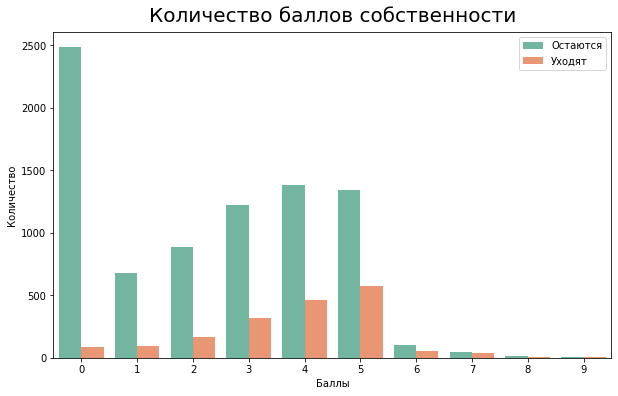

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(x='equity', data=new_df, hue='churn')
plt.legend(labels=['Остаются', 'Уходят'])
plt.title('Количество баллов собственности', fontsize=20, pad=10)
plt.xlabel('Баллы')
plt.ylabel('Количество')
plt.show()

In [41]:
piv = new_df.pivot_table(index='churn', aggfunc={'equity': ['median']}).reset_index()
piv.columns = ['_'.join([str(i).strip() for i in col if i]) for col in piv.columns]
piv = piv.set_index('churn').T
piv.columns=['0', '1']
piv

,0,1
equity_median,3,4


In [42]:
new_df.loc[new_df['churn'] == 0]['equity'].mode()

0    0
dtype: int64

In [43]:
new_df.loc[new_df['churn'] == 1]['equity'].mode()

0    5
dtype: int64

Медианное количество баллов собственности в действующей группе - 3, в отточной - 4, по графику также видно, что в основной группе 0 баллов собственности - это самое частотное значение, в отточной группе - 5.

- количество используемых продуктов

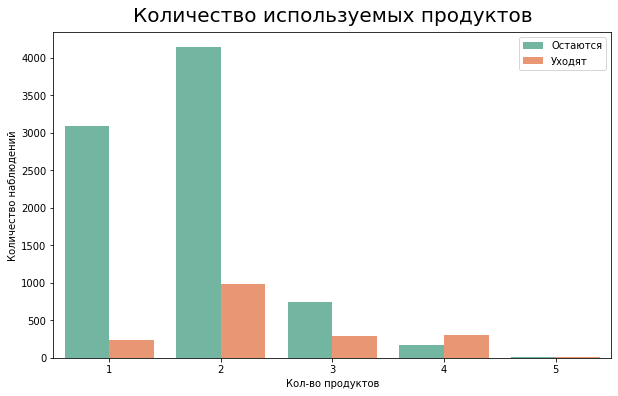

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(x='products', data=new_df, hue='churn')
plt.legend(labels=['Остаются', 'Уходят'])
plt.title('Количество используемых продуктов', fontsize=20, pad=10)
plt.xlabel('Кол-во продуктов')
plt.ylabel('Количество наблюдений')
plt.show()

In [45]:
piv = new_df.pivot_table(index='churn', aggfunc={'products': ['median']}).reset_index()
piv.columns = ['_'.join([str(i).strip() for i in col if i]) for col in piv.columns]
piv = piv.set_index('churn').T
piv.columns=['0', '1']
piv

,0,1
products_median,2,2


In [46]:
new_df.loc[new_df['churn'] == 0]['products'].mode()

0    2
dtype: int64

In [47]:
new_df.loc[new_df['churn'] == 1]['products'].mode()

0    2
dtype: int64

Разницы между наиболее частотным количеством используемых продуктов между группами нет, каждая группа чаще всего использует 2 продукта.

- баланс

In [48]:
new_df.loc[new_df['churn'] == 1]['balance'].describe()

count    1.806000e+03
mean     1.134458e+06
std      2.034446e+06
min      6.000000e+00
25%      3.874822e+05
50%      7.839089e+05
75%      1.348128e+06
max      6.486621e+07
Name: balance, dtype: float64

In [49]:
new_df.loc[new_df['churn'] == 0]['balance'].describe()

count    5.889000e+03
mean     7.330316e+05
std      1.953952e+06
min      0.000000e+00
25%      2.796547e+05
50%      4.754101e+05
75%      8.538264e+05
max      1.191136e+08
Name: balance, dtype: float64

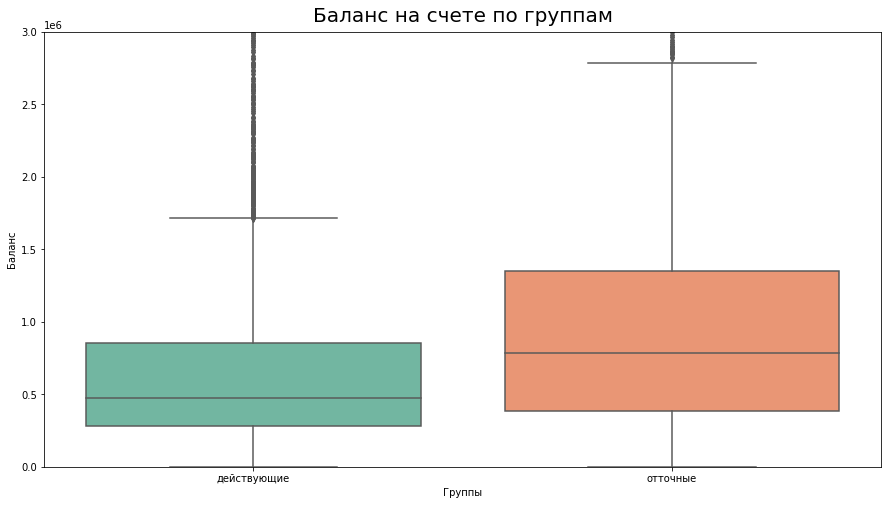

In [50]:
plt.figure(figsize=(15, 8))
ax = sns.boxplot(x='churn', y='balance', data=new_df)
ax.set_ylim([0, 3000000])
plt.title('Баланс на счете по группам', fontsize=20, pad=10)
plt.xlabel('Группы')
plt.ylabel('Баланс')
x_labels = ['действующие', 'отточные'] 
x_ticks = [0, 1]
#add x-axis values to plot
plt.xticks (ticks=x_ticks, labels=x_labels)
# отображаем график на экране
plt.show()

На графиках видны выбросы за пределами усов в обеих группах. Рассмотрим данные за пределами усов, проверим их кол-во и сильно ли они влияют на данные.

In [51]:
perc_25 = np.percentile(new_df.loc[(new_df['churn'] == 1) & ~(df['balance'].isna())]['balance'], 25)
perc_75 = np.percentile(new_df.loc[(new_df['churn'] == 1) & ~(df['balance'].isna())]['balance'], 75)
IQR = perc_75 - perc_25
IQR

960645.3875

In [52]:
churn_group = new_df.loc[new_df['churn'] == 1]
churn_group.loc[new_df['balance'] > perc_75 + 1.5*IQR]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_is_null,rostov,rybinsk,yaroslavl,gender_nums
143,198181,958,Ярославль,М,34,3,5763239.76,2,1,1,920730.06,1,0,0,0,1,1
158,200289,906,Ярославль,Ж,47,4,2850862.57,2,0,1,313845.95,1,0,0,0,1,0
215,214262,971,Ярославль,Ж,35,7,4554977.52,1,1,1,266571.08,1,0,0,0,1,0
330,161384,943,Ярославль,Ж,40,4,2853182.50,4,1,1,224548.68,1,0,0,0,1,0
420,147648,917,Рыбинск,М,41,4,3554336.33,4,0,0,267721.74,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9549,132852,954,Ярославль,М,46,6,3356541.78,4,1,1,204237.55,1,0,0,0,1,1
9577,189537,959,Рыбинск,М,37,5,4804082.21,4,1,0,310739.14,1,0,0,1,0,1
9891,161917,963,Ярославль,М,27,4,4028889.42,2,0,1,376158.61,1,0,0,0,1,1
9908,211089,993,Рыбинск,М,38,6,4542980.70,1,1,1,491609.13,1,0,0,1,0,1


In [53]:
(len(churn_group.loc[new_df['balance'] > perc_75 + 1.5*IQR]) / len(churn_group)) * 100

5.9405940594059405

Мы посмотрели на данные, которые являются выбросами группы оттока. Они занимают 5,9% от кол-ва наблюдений в данной группе. Поскольку клиенты с большим балансом на счете реально являются клиентами банка, оставим их для дальнейшего анализа. Соответственно также оставляем клиентом и в основной группе. 

In [54]:
piv = new_df.pivot_table(index='churn', aggfunc={'balance': ['mean', 'median']}).reset_index()
piv.columns = ['_'.join([str(i).strip() for i in col if i]) for col in piv.columns]
piv = piv.set_index('churn').T
piv.columns=['0', '1']
piv['difference_perc'] = (piv['1'] / piv['0']) -1
piv.style.format({'difference_perc': '{:.2%}'})

,0,1,difference_perc
balance_mean,733031.630149,1134458.209291,54.76%
balance_median,475410.090000,783908.900000,64.89%


Отточная группа держит денежных средств на балансе, в среднем, на 54% больше, нежели группа действующих клиентов. Медиана отточной группы - 783000, медиана в основной группе - 475000.

- наличие кредитной карты

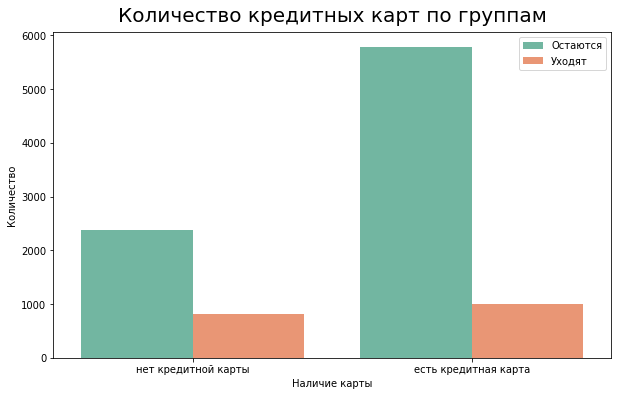

In [55]:
plt.figure(figsize=(10, 6))
sns.countplot(x='credit_card', data=new_df, hue='churn')
plt.legend(labels=['Остаются', 'Уходят'])
x_labels = ['нет кредитной карты', 'есть кредитная карта'] 
x_ticks = [0, 1]
#add x-axis values to plot
plt.xticks (ticks=x_ticks, labels=x_labels)
plt.title('Количество кредитных карт по группам', fontsize=20, pad=10)
plt.xlabel('Наличие карты')
plt.ylabel('Количество')
plt.show()

In [56]:
piv = new_df.pivot_table(index='credit_card', columns='churn', aggfunc={'credit_card': 'count'}).reset_index()
piv.columns = ['credit_card', 'churn_0', 'churn_1']
piv = piv.set_index('credit_card').T
piv['percent_of_not_having'] = piv[0] / (piv[0] + piv[1])
piv['percent_of_having'] = piv[1] / (piv[1] + piv[0])
piv.style.format({'percent_of_having': '{:.2%}', 'percent_of_not_having': '{:.2%}'})


credit_card,0,1,percent_of_not_having,percent_of_having
churn_0,2374,5781,29.11%,70.89%
churn_1,815,1003,44.83%,55.17%


Среди текущих клиентов около 70% имеют кредитные карты, среди отточных клиентов этот процент снижается до 55%.

- оценочный доход

In [57]:
new_df.loc[new_df.churn == 1].est_salary.describe()

count    1.818000e+03
mean     1.483575e+05
std      1.229320e+05
min      1.088027e+04
25%      8.328566e+04
50%      1.254089e+05
75%      1.760178e+05
max      1.263028e+06
Name: est_salary, dtype: float64

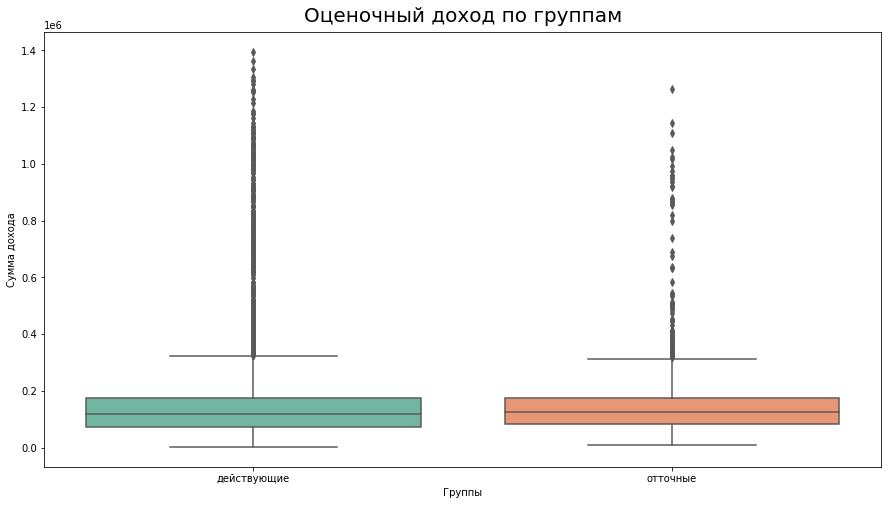

In [58]:
plt.figure(figsize=(15, 8))
ax = sns.boxplot(x='churn', y='est_salary', data=new_df)
plt.title('Оценочный доход по группам', fontsize=20, pad=10)
plt.xlabel('Группы')
plt.ylabel('Сумма дохода')
x_labels = ['действующие', 'отточные'] 
x_ticks = [0, 1]
#add x-axis values to plot
plt.xticks (ticks=x_ticks, labels=x_labels)
# отображаем график на экране
plt.show()

In [59]:
perc_25 = np.percentile(new_df.loc[(new_df['churn'] == 1) & ~(df['est_salary'].isna())]['est_salary'], 25)
perc_75 = np.percentile(new_df.loc[(new_df['churn'] == 1) & ~(df['est_salary'].isna())]['est_salary'], 75)
IQR = perc_75 - perc_25
IQR

92732.17750000002

In [60]:
churn_group = new_df.loc[new_df['churn'] == 1]
churn_group.loc[new_df['est_salary'] > perc_75 + 1.5*IQR].shape[0]

82

In [61]:
(len(churn_group.loc[new_df['est_salary'] > perc_75 + 1.5*IQR]) / len(churn_group)) * 100

4.51045104510451

По признаку оценочного дохода в обеих группах наблюдаются выбросы. В группе оттока они составляют 4,5%. Также избавляться от данных не будем, поскольку они отражают реальное положение вещей в банке.

In [62]:
churn_group.loc[new_df['est_salary'] > perc_75 + 1.5*IQR]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_is_null,rostov,rybinsk,yaroslavl,gender_nums
143,198181,958,Ярославль,М,34,3,5763239.76,2,1,1,920730.06,1,0,0,0,1,1
447,123988,913,Рыбинск,М,56,5,1995160.41,2,0,1,366172.78,1,0,0,1,0,1
560,226660,907,Ярославль,М,36,4,3211314.88,2,0,1,403450.79,1,0,0,0,1,1
634,141301,952,Ярославль,М,35,5,6673219.33,4,1,0,406287.12,1,0,0,0,1,1
772,191295,912,Ярославль,Ж,41,3,1164422.46,4,1,1,325491.22,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9473,149844,930,Ярославль,М,37,4,3393367.34,2,0,0,340359.76,1,0,0,0,1,1
9547,140641,805,Рыбинск,М,49,3,463601.58,2,1,0,350743.24,1,0,0,1,0,1
9891,161917,963,Ярославль,М,27,4,4028889.42,2,0,1,376158.61,1,0,0,0,1,1
9908,211089,993,Рыбинск,М,38,6,4542980.70,1,1,1,491609.13,1,0,0,1,0,1


In [63]:
piv = new_df.pivot_table(index='churn', aggfunc={'est_salary': ['mean', 'median']}).reset_index()
piv.columns = ['_'.join([str(i).strip() for i in col if i]) for col in piv.columns]
piv = piv.set_index('churn').T
piv.columns=['0', '1']
piv['difference_perc'] = (piv['1'] / piv['0']) -1
piv.style.format({'difference_perc': '{:.2%}'})

,0,1,difference_perc
est_salary_mean,147674.637881,148357.483157,0.46%
est_salary_median,118227.600000,125408.880000,6.07%


Оценочный доход в группах примерно на одинаковом уровне. Медиана оценочного дохода в группах на 7000 больше.

- активность

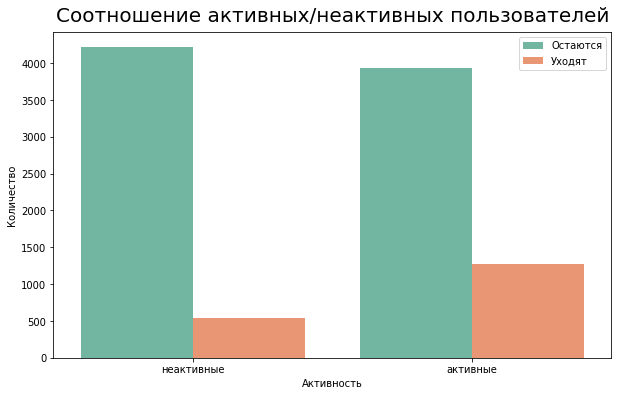

In [64]:
plt.figure(figsize=(10, 6))
sns.countplot(x='last_activity', data=new_df, hue='churn')
plt.legend(labels=['Остаются', 'Уходят'])
x_labels = ['неактивные', 'активные'] 
x_ticks = [0, 1]
#add x-axis values to plot
plt.xticks (ticks=x_ticks, labels=x_labels)
plt.title('Соотношение активных/неактивных пользователей', fontsize=20, pad=10)
plt.xlabel('Активность')
plt.ylabel('Количество')
plt.show()

In [65]:
piv = new_df.pivot_table(index='last_activity', columns='churn', aggfunc={'last_activity': 'count'}).reset_index()
piv.columns = ['last_activity', 'churn_0', 'churn_1']
piv = piv.set_index('last_activity').T
piv['percent_of_non_active'] = piv[0] / (piv[0] + piv[1])
piv['percent_of_active'] = piv[1] / (piv[0] + piv[1])
piv.style.format({'percent_of_non_active': '{:.2%}', 'percent_of_active': '{:.2%}'})

last_activity,0,1,percent_of_non_active,percent_of_active
churn_0,4217,3938,51.71%,48.29%
churn_1,541,1277,29.76%,70.24%


Среди клиентов, которые входят в группу оттока, 70% являются активными пользователями,  т.е. совершали какие-то действия в течение последних 3-х месяцев. Среди основной группы соотношение активных и неактивных клиентов примерно половина на половину.

- город

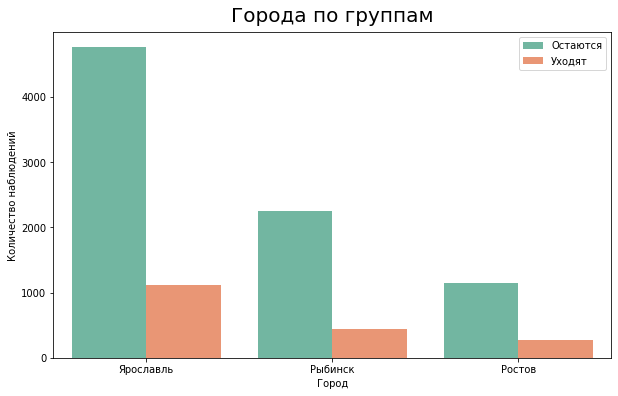

In [66]:
plt.figure(figsize=(10, 6))
sns.countplot(x='city', data=new_df, hue='churn', \
    order=new_df.loc[new_df['churn'] == 0].groupby( ['city'])['city'].agg('count').sort_values(ascending=False).index)
plt.legend(labels=['Остаются', 'Уходят'])
plt.title('Города по группам', fontsize=20, pad=10)
plt.xlabel('Город')
plt.ylabel('Количество наблюдений')
plt.show()

In [67]:
piv = new_df.pivot_table(index='city', columns='churn', aggfunc={'city': 'count'}).reset_index()
piv.columns = ['city', 'churn_0', 'churn_1']
piv = piv.set_index('city').T
piv

city,Ростов,Рыбинск,Ярославль
churn_0,1151,2246,4758
churn_1,265,436,1117


В обеих группах большая часть пользователей из Ярославля.

- churn

In [68]:
churn_perc = new_df['churn'].mean()
print(f'Доля оттока по банку: {churn_perc:.2%}')

Доля оттока по банку: 18.23%


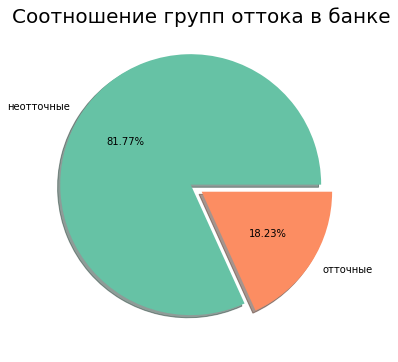

In [69]:
explode=(0.1, 0)
plt.figure(figsize=(6, 6))
labels = ['неотточные', 'отточные']
plt.pie(new_df.groupby('churn')['churn'].count(), \
        labels=labels, explode=explode, autopct='%1.2f%%', shadow=True)
plt.title('Соотношение групп оттока в банке', fontsize=20)
plt.show()

Около 18% клиентов банка в группе тех, кто хочет покинуть банк.

In [70]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9973 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          9973 non-null   int64  
 1   score            9973 non-null   int64  
 2   city             9973 non-null   object 
 3   gender           9973 non-null   object 
 4   age              9973 non-null   int64  
 5   equity           9973 non-null   int64  
 6   balance          7695 non-null   float64
 7   products         9973 non-null   int64  
 8   credit_card      9973 non-null   int64  
 9   last_activity    9973 non-null   int64  
 10  est_salary       9973 non-null   float64
 11  churn            9973 non-null   int64  
 12  balance_is_null  9973 non-null   int64  
 13  rostov           9973 non-null   uint8  
 14  rybinsk          9973 non-null   uint8  
 15  yaroslavl        9973 non-null   uint8  
 16  gender_nums      9973 non-null   uint8  
dtypes: float64(2),

Представим итогово все показатели по отточным/неотточным клиентам в единой таблице:

In [71]:
pivot_all = new_df.pivot_table(index='churn', aggfunc={'score': ['mean', 'median'], 'balance':['mean', 'median'], \
                                           'est_salary': ['mean', 'median'], 'age': ['mean', 'median'], \
                                           'equity': 'median', 'products': 'median', 'credit_card': 'mean', \
                                            'last_activity': 'mean', 'rostov': 'mean', 'rybinsk': 'mean', \
                                            'yaroslavl': 'mean', 'gender_nums': 'mean'})
pivot_all.columns = ['_'.join([str(i).strip() for i in col if i]) for col in pivot_all.columns]
pivot_all

,age_mean,age_median,balance_mean,balance_median,credit_card_mean,equity_median,est_salary_mean,est_salary_median,gender_nums_mean,last_activity_mean,products_median,rostov_mean,rybinsk_mean,score_mean,score_median,yaroslavl_mean
churn,,,,,,,,,,,,,,,,
0,43.020846,40.0,7.330316e+05,475410.09,0.708890,3,147674.637881,118227.60,0.466953,0.482894,2,0.141140,0.275414,845.396199,848.0,0.583446
1,41.429593,39.0,1.134458e+06,783908.90,0.551705,4,148357.483157,125408.88,0.650715,0.702420,2,0.145765,0.239824,863.361936,866.0,0.614411


Таким образом, сформулировать портреты отточных и неотточных клиентов можно следующим образом:

1. Неотточные клиенты
- средний возраст 43 года
- баланс на счете около 475000
- с вероятностью 70% пользуется кредитной картой
- доход около 118000
- кол-во баллов собственности на уровне 3
- примерно 47/53 может быть мужчиной или женщиной
- кол-во исплользуемых продуктов на уровне 2
- кредитный рейтинг в среднем 848 баллов
- с 58% вероятностью из Ярославля, 27% из Рыбинска, 15% из Ростова

2. Отточные клиенты

- средний возраст около 40 лет
- баланс на счете около 783000
- с вероятностью 55% пользуется кредитной картой
- доход около 125000
- кол-во баллов собственности на уровне 4
- примерно 65/35 может быть мужчиной или женщиной
- кол-во исплользуемых продуктов на уровне 2
- кредитный рейтинг в среднем 866 баллов
- с 62% вероятностью из Ярославля, 24% из Рыбинска, 14% из Ростова
- с 70% вероятностью активный клиент


#### Изучение количественных признаков оттока:
- возраст;
- баллы кредитного скоринга;
- баланс на счете;
- оценочный доход.

Построение распределений признаков.

- возраст

In [72]:
new_df.loc[(new_df['churn'] == 1)]['age'].describe()

count    1818.000000
mean       41.429593
std        11.144754
min        18.000000
25%        32.000000
50%        39.000000
75%        52.000000
max        75.000000
Name: age, dtype: float64

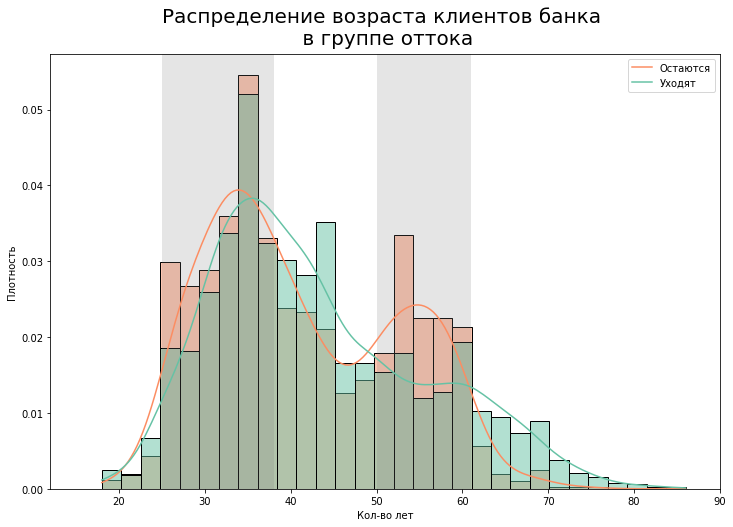

In [73]:
plt.figure(figsize=(12, 8))
sns.histplot(new_df, x='age', hue='churn', stat='density', common_norm=False, kde=True, 
             bins=30)
plt.axvspan(xmin=25, xmax=38, facecolor='grey', alpha=0.2) 
plt.axvspan(xmin=50, xmax=61, facecolor='grey', alpha=0.2) 
plt.legend(labels=['Остаются', 'Уходят'])
plt.xlim(12, 90)
plt.title('Распределение возраста клиентов банка \n в группе оттока', fontsize=20, pad=10)
plt.xlabel('Кол-во лет')
plt.ylabel('Плотность')
plt.show()

In [74]:
new_df.loc[(new_df['churn'] == 1) & ~(new_df['age'] == -1)]['age'].mode()

0    34
dtype: int64

Наибольшее кол-во клиентов в отточной группе в промежутке от 25 до 38 лет с пиком в 34 года. По распределению заметен всплеск отточных клиентов в возрасте примерно от 50 до 61 лет.

- баллы кредитного скоринга

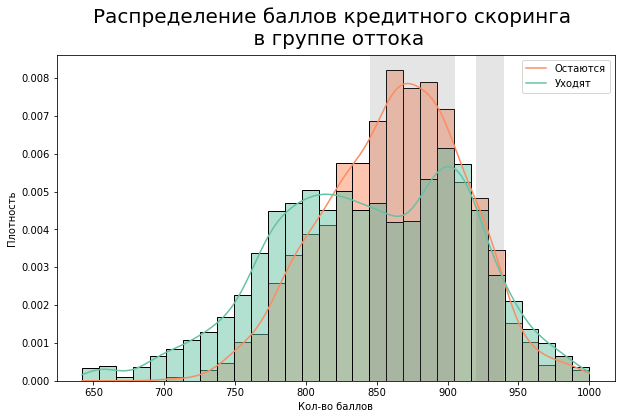

In [75]:
plt.figure(figsize=(10, 6))
sns.histplot(new_df, x='score', hue='churn', stat='density', common_norm=False, kde=True, 
             bins=30)
plt.legend(labels=['Остаются', 'Уходят'])
plt.axvspan(xmin=845, xmax=905, facecolor='grey', alpha=0.2) 
plt.axvspan(xmin=920, xmax=940, facecolor='grey', alpha=0.2) 
plt.title('Распределение баллов кредитного скоринга \n в группе оттока', fontsize=20, pad=10)
plt.xlabel('Кол-во баллов')
plt.ylabel('Плотность')
plt.show()

In [76]:
new_df.loc[(new_df['churn'] == 1)]['score'].describe()

count    1818.000000
mean      863.361936
std        49.580696
min       706.000000
25%       828.000000
50%       866.000000
75%       898.000000
max      1000.000000
Name: score, dtype: float64

Распределение баллов кредитного скоринга схоже с нормальным со средним значением в 857 баллов (распределение немного скошено влево). По графику видно, что на промежутках 845-905 и 920-940 баллов преобладают ушедшие клиенты. Более низкие кредитные рейтинги как раз-таки у клиентов, которые планируют остаться в банке.

- баланс на счете

In [77]:
new_df['balance'].describe()

count    7.695000e+03
mean     8.272456e+05
std      1.980327e+06
min      0.000000e+00
25%      2.956987e+05
50%      5.242953e+05
75%      9.800512e+05
max      1.191136e+08
Name: balance, dtype: float64

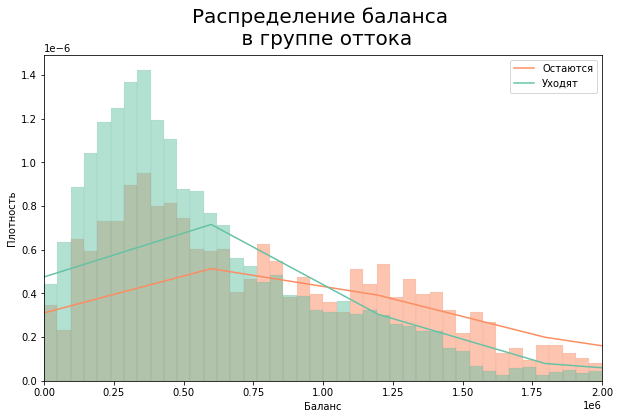

In [78]:
plt.figure(figsize=(10, 6))
sns.histplot(new_df, x='balance', hue='churn', stat='density', common_norm=False, kde=True, 
             bins=2500)
plt.title('Распределение баланса \n в группе оттока', fontsize=20, pad=10)
plt.legend(labels=['Остаются', 'Уходят'])
plt.xlim(0, 2000000)
plt.xlabel('Баланс')
plt.ylabel('Плотность')
plt.show()

In [79]:
new_df.loc[(new_df['churn'] == 1)]['balance'].describe()

count    1.806000e+03
mean     1.134458e+06
std      2.034446e+06
min      6.000000e+00
25%      3.874822e+05
50%      7.839089e+05
75%      1.348128e+06
max      6.486621e+07
Name: balance, dtype: float64

In [80]:
new_df.loc[(new_df['churn'] == 0)]['balance'].describe()

count    5.889000e+03
mean     7.330316e+05
std      1.953952e+06
min      0.000000e+00
25%      2.796547e+05
50%      4.754101e+05
75%      8.538264e+05
max      1.191136e+08
Name: balance, dtype: float64

Распределение скошено вправо, что все-таки говорит о наличии крупных значений, которые влияют на средний показатель. В группе оттока, в среднем, на балансах по 1,1 млн (медиана - 783 т.р.). По графику четко видно, большинство клиентов, желающих остаться, имеют балансы до 700000. Чем правее идет график, тем более преобладание клиентов группы оттока. 

- оценочный доход

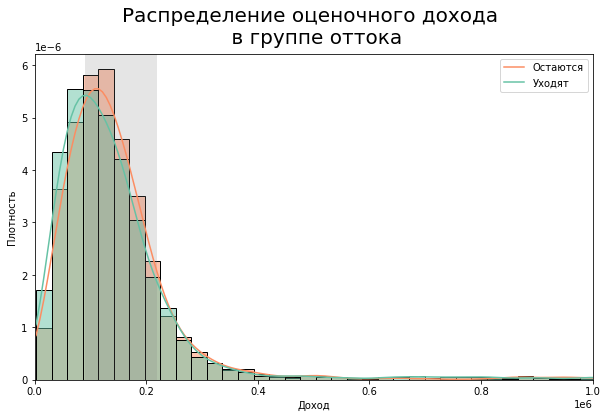

In [81]:
plt.figure(figsize=(10, 6))
sns.histplot(new_df, x='est_salary', hue='churn', stat='density', common_norm=False, kde=True, 
             bins=50)
plt.axvspan(xmin=90000, xmax=220000, facecolor='grey', alpha=0.2) 
plt.legend(labels=['Остаются', 'Уходят'])
plt.xlim(0, 1000000)
plt.title('Распределение оценочного дохода \n в группе оттока', fontsize=20, pad=10)
plt.xlabel('Доход')
plt.ylabel('Плотность')
plt.show()

In [82]:
new_df['est_salary'].describe()

count    9.973000e+03
mean     1.477991e+05
std      1.392871e+05
min      2.546300e+03
25%      7.525202e+04
50%      1.196431e+05
75%      1.745000e+05
max      1.395064e+06
Name: est_salary, dtype: float64

In [83]:
new_df.loc[new_df['churn'] == 0]['est_salary'].describe()

count    8.155000e+03
mean     1.476746e+05
std      1.426844e+05
min      2.546300e+03
25%      7.344555e+04
50%      1.182276e+05
75%      1.739609e+05
max      1.395064e+06
Name: est_salary, dtype: float64

In [84]:
new_df.loc[new_df['churn'] == 1]['est_salary'].describe()

count    1.818000e+03
mean     1.483575e+05
std      1.229320e+05
min      1.088027e+04
25%      8.328566e+04
50%      1.254089e+05
75%      1.760178e+05
max      1.263028e+06
Name: est_salary, dtype: float64

Распределение скошено вправо. Но в целом, различия в обеих группах несильные. В группе оттока медиана оценочного дохода на уровне 125000, в группе текущих клиентов - 118000. Преобладание отточных клиентов на участке 90-220 т.р.

#### Уровни оттока по категориям:

- пол

In [85]:
grouped = new_df.groupby('gender_nums', as_index=False)['churn'].mean()
grouped

,gender_nums,churn
0,0,0.127459
1,1,0.237027


Text(0.5, 0, 'Пол')

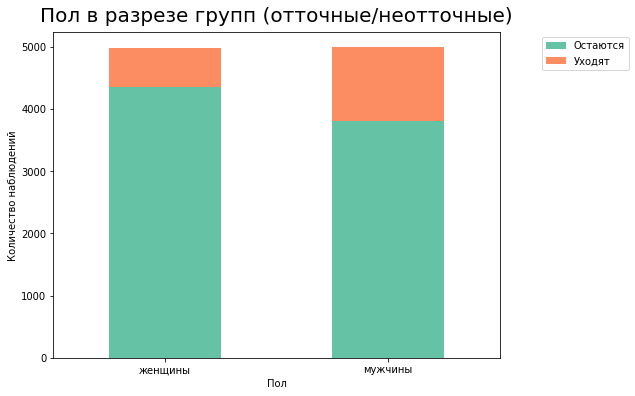

In [86]:
new_df.pivot_table(index='gender_nums', columns='churn', values='user_id',aggfunc='count').plot.bar(stacked=True,  figsize=(8,6)) 
plt.title('Пол в разрезе групп (отточные/неотточные)', fontsize=20, pad=10)
ticks=[0, 1]
x = ['женщины', 'мужчины']
plt.legend(labels=['Остаются', 'Уходят'], bbox_to_anchor=(1.3, 1))
plt.xticks(labels=x, ticks=ticks, rotation=0)
plt.ylabel('Количество наблюдений')
plt.xlabel('Пол')

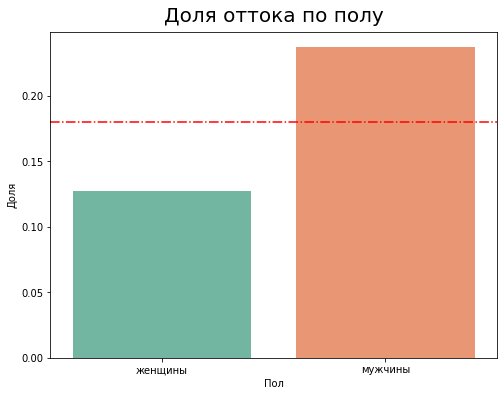

In [87]:
plt.figure(figsize=(8,6))
sns.barplot(x="gender_nums", y="churn", data=grouped)
plt.title('Доля оттока по полу', fontsize=20, pad=10)
ticks=[0, 1]
x = ['женщины', 'мужчины']
plt.axhline(y=0.18, color='red', linestyle='dashdot')
plt.xticks(labels=x, ticks=ticks, rotation=0)
plt.ylabel('Доля')
plt.xlabel('Пол')
plt.show()

Среди всех женщин только 12% находятся в группе оттока, среди всех мужчин почти 24% находятся в группе оттока, что выше средней доли оттока по всему банку.

- кол-во используемых продуктов

In [88]:
pivot_category = new_df.pivot_table(index='products', columns='churn', values='user_id',aggfunc='count').reset_index()
pivot_category

churn,products,0,1
0,1,3088,235
1,2,4141,978
2,3,741,297
3,4,174,300
4,5,11,8


In [89]:
pivot_category['sum'] = pivot_category[0] + pivot_category[1]
pivot_category['0_perc'] = pivot_category[0] / pivot_category['sum']
pivot_category['1_perc'] = pivot_category[1] / pivot_category['sum']
pivot_category

churn,products,0,1,sum,0_perc,1_perc
0,1,3088,235,3323,0.929281,0.070719
1,2,4141,978,5119,0.808947,0.191053
2,3,741,297,1038,0.713873,0.286127
3,4,174,300,474,0.367089,0.632911
4,5,11,8,19,0.578947,0.421053


Text(0.5, 0, 'Количество используемых продуктов')

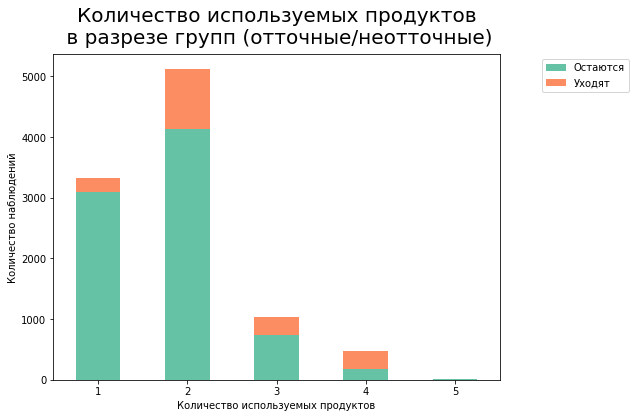

In [90]:
new_df.pivot_table(index='products', columns='churn', values='user_id',aggfunc='count').plot.bar(stacked=True,  figsize=(8,6)) 
plt.title('Количество используемых продуктов\n в разрезе групп (отточные/неотточные)', fontsize=20, pad=10)
plt.legend(labels=['Остаются', 'Уходят'], bbox_to_anchor=(1.3, 1))
plt.xticks(rotation=0)
plt.ylabel('Количество наблюдений')
plt.xlabel('Количество используемых продуктов')

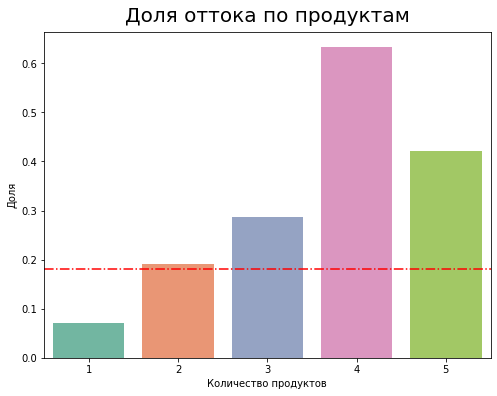

In [91]:
plt.figure(figsize=(8,6))
sns.barplot(x='products', y='1_perc', data=pivot_category)
plt.title('Доля оттока по продуктам', fontsize=20, pad=10)
plt.axhline(y=0.18, color='red', linestyle='dashdot')
plt.ylabel('Доля')
plt.xlabel('Количество продуктов')
plt.show()

Большая часть пользователей в группе оттока использует 2 продукта банка. Наибольшая доля отточных клиентов среди тех, кто пользуется 4 и 5 продуктами.

- активность клиента

In [92]:
grouped = new_df.groupby('last_activity', as_index=False)['churn'].mean()
grouped

,last_activity,churn
0,0,0.113703
1,1,0.244871


Text(0.5, 0, 'Активность')

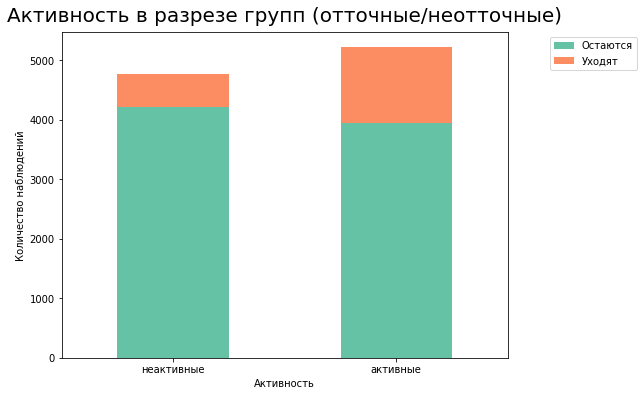

In [93]:
new_df.pivot_table(index='last_activity', columns='churn', values='user_id',aggfunc='count').plot.bar(stacked=True,  figsize=(8,6)) 
plt.title('Активность в разрезе групп (отточные/неотточные)', fontsize=20, pad=10)
ticks=[0, 1]
x = ['неактивные', 'активные']
plt.legend(labels=['Остаются', 'Уходят'], bbox_to_anchor=(1.3, 1))
plt.xticks(labels=x, ticks=ticks, rotation=0)
plt.ylabel('Количество наблюдений')
plt.xlabel('Активность')

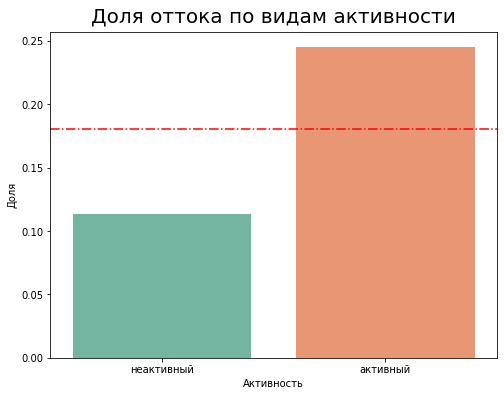

In [94]:
plt.figure(figsize=(8,6))
sns.barplot(x="last_activity", y="churn", data=grouped)
plt.title('Доля оттока по видам активности', fontsize=20, pad=10)
ticks=[0, 1]
x = ['неактивный', 'активный']
plt.axhline(y=0.18, color='red', linestyle='dashdot')
plt.xticks(labels=x, ticks=ticks, rotation=0)
plt.ylabel('Доля')
plt.xlabel('Активность')
plt.show()

Большинство отточных клиентов - активные пользователи банка. Среди активных пользователей 24% отточные, среди неактивных пользователей 11% отточных пользователей. 

- наличие кредитной карты

In [95]:
grouped = new_df.groupby('credit_card', as_index=False)['churn'].mean()
grouped

,credit_card,churn
0,0,0.255566
1,1,0.147848


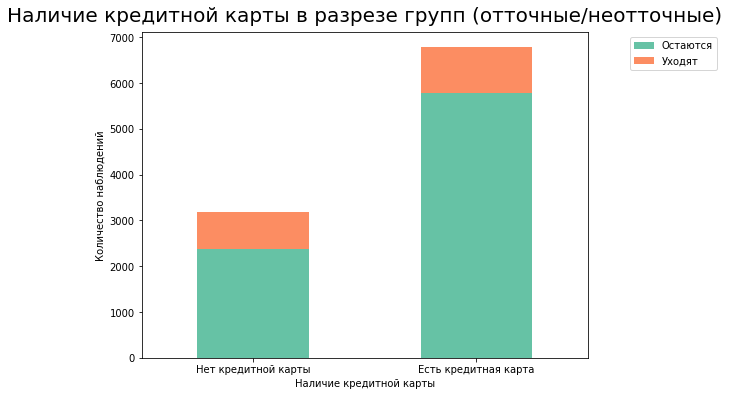

In [96]:
new_df.pivot_table(index='credit_card', columns='churn', values='user_id',aggfunc='count').plot.bar(stacked=True,  figsize=(8,6)) 
plt.title('Наличие кредитной карты в разрезе групп (отточные/неотточные)', fontsize=20, pad=10)
ticks=[0, 1]
x = ['Нет кредитной карты', 'Есть кредитная карта']
plt.legend(labels=['Остаются', 'Уходят'], bbox_to_anchor=(1.3, 1))
plt.xticks(labels=x, ticks=ticks, rotation=0)
plt.ylabel('Количество наблюдений')
plt.xlabel('Наличие кредитной карты')
plt.show()

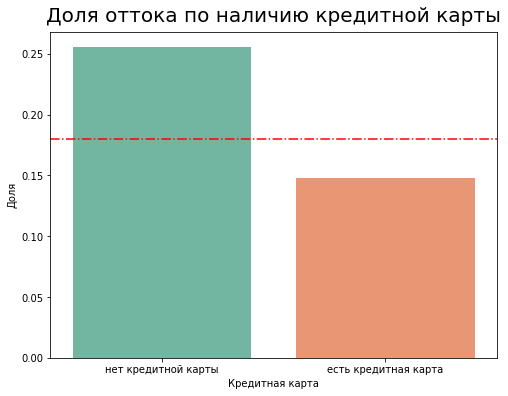

In [97]:
plt.figure(figsize=(8,6))
sns.barplot(x="credit_card", y="churn", data=grouped)
plt.title('Доля оттока по наличию кредитной карты', fontsize=20, pad=10)
ticks=[0, 1]
x = ['нет кредитной карты', 'есть кредитная карта']
plt.axhline(y=0.18, color='red', linestyle='dashdot')
plt.xticks(labels=x, ticks=ticks, rotation=0)
plt.ylabel('Доля')
plt.xlabel('Кредитная карта')
plt.show()

Среди пользователей с кредитными картами 14,7% отточные, в группе без кредитных карт 25,5% отточных.

- город

Text(0.5, 0, 'Город')

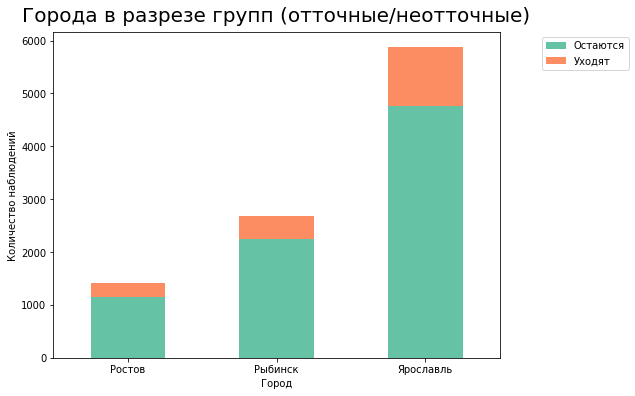

In [98]:
new_df.pivot_table(index='city', columns='churn', values='user_id',aggfunc='count').plot.bar(stacked=True,  figsize=(8,6)) 
plt.title('Города в разрезе групп (отточные/неотточные)', fontsize=20, pad=10)
plt.legend(labels=['Остаются', 'Уходят'], bbox_to_anchor=(1.3, 1))
plt.xticks(rotation=0)
plt.ylabel('Количество наблюдений')
plt.xlabel('Город')

In [99]:
pivot_category = new_df.pivot_table(index='city', columns='churn', values='user_id',aggfunc='count').reset_index()
pivot_category['sum'] = pivot_category[0] + pivot_category[1]
pivot_category['0_perc'] = pivot_category[0] / pivot_category['sum']
pivot_category['1_perc'] = pivot_category[1] / pivot_category['sum']
pivot_category

churn,city,0,1,sum,0_perc,1_perc
0,Ростов,1151,265,1416,0.812853,0.187147
1,Рыбинск,2246,436,2682,0.837435,0.162565
2,Ярославль,4758,1117,5875,0.809872,0.190128


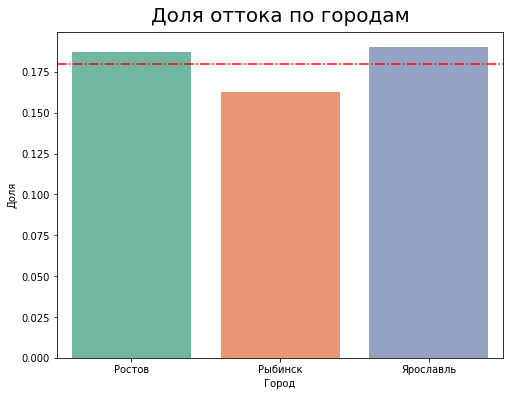

In [100]:
plt.figure(figsize=(8,6))
sns.barplot(x='city', y='1_perc', data=pivot_category)
plt.title('Доля оттока по городам', fontsize=20, pad=10)
plt.axhline(y=0.18, color='red', linestyle='dashdot')
plt.ylabel('Доля')
plt.xlabel('Город')
plt.show()

В группе оттока большая часть пользователей из Ярославля. 

- кол-во баллов собственности

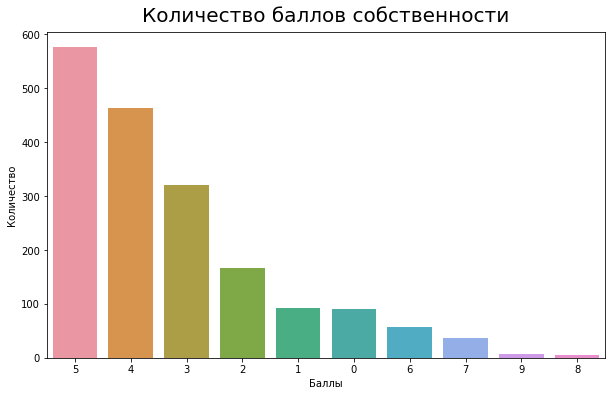

In [101]:
plt.figure(figsize=(10, 6))
sns.countplot(x='equity', data=new_df.loc[(new_df['churn'] == 1)],\
              order=new_df.loc[(new_df['churn'] == 1)].groupby('equity')['equity'].count().sort_values(ascending=False).index)
plt.title('Количество баллов собственности', fontsize=20, pad=10)
plt.xlabel('Баллы')
plt.ylabel('Количество')
plt.show()

In [102]:
pivot = new_df.loc[(new_df['churn'] == 1)].pivot_table(index='equity', values='user_id', aggfunc='count').reset_index()
pivot.columns = ['equity', 'count_user_id']
pivot['all'] = sum(pivot['count_user_id'])
pivot['percent'] = pivot['count_user_id'] / pivot['all']
pivot.sort_values(by='percent', ascending=False).style.format({'percent': '{:.2%}'})

,equity,count_user_id,all,percent
5,5,576,1818,31.68%
4,4,464,1818,25.52%
3,3,321,1818,17.66%
2,2,166,1818,9.13%
1,1,93,1818,5.12%
0,0,90,1818,4.95%
6,6,58,1818,3.19%
7,7,37,1818,2.04%
9,9,7,1818,0.39%
8,8,6,1818,0.33%


Text(0.5, 0, 'Баллы')

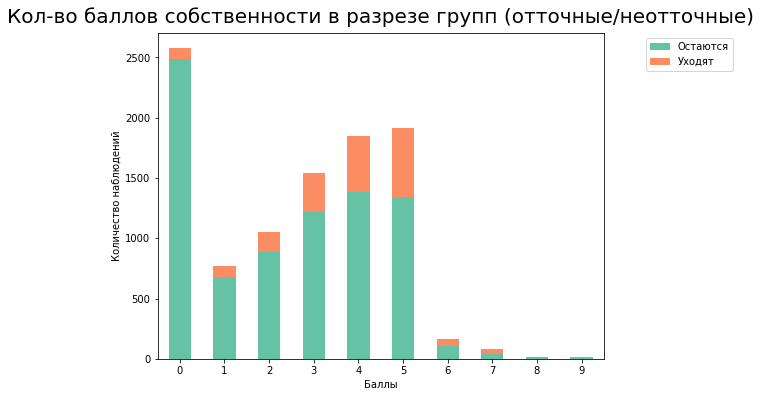

In [103]:
new_df.pivot_table(index='equity', columns='churn', values='user_id',aggfunc='count').plot.bar(stacked=True,  figsize=(8,6)) 
plt.title('Кол-во баллов собственности в разрезе групп (отточные/неотточные)', fontsize=20, pad=10)
plt.legend(labels=['Остаются', 'Уходят'], bbox_to_anchor=(1.3, 1))
plt.xticks(rotation=0)
plt.ylabel('Количество наблюдений')
plt.xlabel('Баллы')

In [104]:
pivot_category = new_df.pivot_table(index='equity', columns='churn', values='user_id',aggfunc='count').reset_index()
pivot_category['sum'] = pivot_category[0] + pivot_category[1]
pivot_category['0_perc'] = pivot_category[0] / pivot_category['sum']
pivot_category['1_perc'] = pivot_category[1] / pivot_category['sum']
pivot_category

churn,equity,0,1,sum,0_perc,1_perc
0,0,2486,90,2576,0.965062,0.034938
1,1,680,93,773,0.879690,0.120310
2,2,885,166,1051,0.842055,0.157945
3,3,1219,321,1540,0.791558,0.208442
4,4,1383,464,1847,0.748782,0.251218
5,5,1339,576,1915,0.699217,0.300783
6,6,103,58,161,0.639752,0.360248
7,7,43,37,80,0.537500,0.462500
8,8,11,6,17,0.647059,0.352941
9,9,6,7,13,0.461538,0.538462


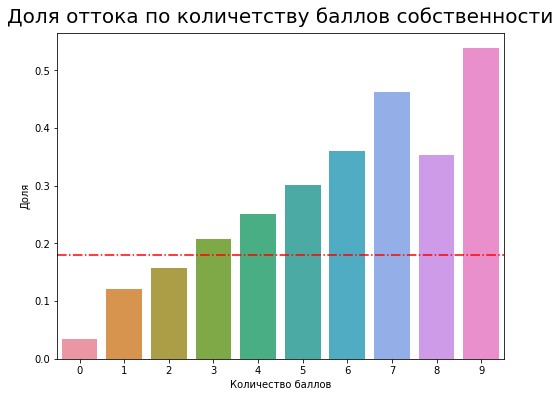

In [105]:
plt.figure(figsize=(8,6))
sns.barplot(x='equity', y='1_perc', data=pivot_category)
plt.title('Доля оттока по количетству баллов собственности', fontsize=20, pad=10)
plt.axhline(y=0.18, color='red', linestyle='dashdot')
plt.ylabel('Доля')
plt.xlabel('Количество баллов')
plt.show()

Наибольшие доли ушедших среди от 4 и выше баллов собственности.

#### Корреляционный анализ

Построить графики корреляции по количественным признакам, посчитать коэффициент корреляции. Описать связь/ее отсутствие
Корреляционный анализ проводим именно по группе оттока, чтобы понять, как признаки именно в этой группе связаны друг с другом, и эти особенности далее учитывать при расределении пользователей на сегменты.

In [106]:
churn_group = churn_group.drop(['user_id', 'gender', 'churn', 'balance_is_null'], axis=1)

In [107]:
corr = churn_group.phik_matrix(interval_cols=['balance', 'est_salary'])
corr

,score,city,age,equity,balance,products,credit_card,last_activity,est_salary,rostov,rybinsk,yaroslavl,gender_nums
score,1.000000,0.000000,0.546467,0.498390,0.940519,0.322836,0.226280,0.318140,0.812271,0.000000,0.000000,0.000000,0.000000
city,0.000000,1.000000,0.145440,0.043947,0.019926,0.168642,0.038916,0.027848,0.123928,1.000000,1.000000,1.000000,0.016032
age,0.546467,0.145440,1.000000,0.171960,0.000000,0.182462,0.086658,0.166107,0.371869,0.107919,0.000000,0.120482,0.170853
equity,0.498390,0.043947,0.171960,1.000000,0.000000,0.236091,0.189419,0.150339,0.087370,0.000000,0.030692,0.066130,0.000000
balance,0.940519,0.019926,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.701763,0.000000,0.025346,0.040672,0.000000
products,0.322836,0.168642,0.182462,0.236091,0.000000,1.000000,0.322724,0.095610,0.141777,0.071584,0.111187,0.145253,0.060137
credit_card,0.226280,0.038916,0.086658,0.189419,0.000000,0.322724,1.000000,0.143205,0.069839,0.056500,0.058738,0.105103,0.259903
last_activity,0.318140,0.027848,0.166107,0.150339,0.000000,0.095610,0.143205,1.000000,0.061772,0.043482,0.066817,0.000000,0.230784
est_salary,0.812271,0.123928,0.371869,0.087370,0.701763,0.141777,0.069839,0.061772,1.000000,0.098680,0.048774,0.147929,0.000000
rostov,0.000000,1.000000,0.107919,0.000000,0.000000,0.071584,0.056500,0.043482,0.098680,1.000000,0.352097,0.728381,0.000000


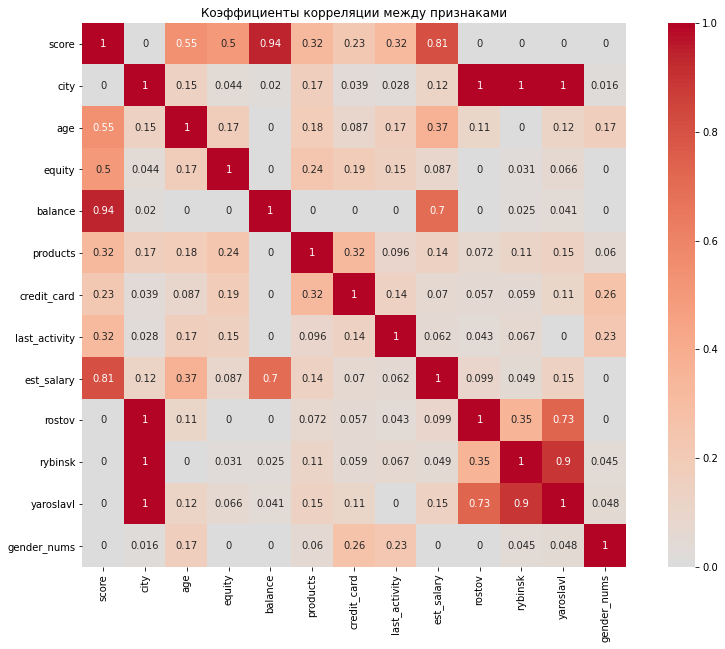

In [108]:
plt.figure(figsize=(15,10))
sns.heatmap(corr,
           cmap='coolwarm',
           vmax=1,
           annot=True,
           center=0,
           square=True)
plt.title('Коэффициенты корреляции между признаками')
plt.show()

По шкале Чеддока сила связи описывается следующим образом:

- 0 полное отсутствие связи;
- 0 – 0.3 – очень слабая;
- 0.3 – 0.5 – слабая;
- 0.5 – 0.7 – средняя;
- 0.7 – 0.9 – высокая;
- 0.9 – 1 – очень высокая.

Высокая связь наблюдается городами, но оценить ее нет смысла.

Очень высокая связь: кредитный рейтинг и баланс.

Высокая связь: кредитный рейтинг и доход, баланс и доход.

Средняя связь наблюдается между показателями баллов кредитного рейтинга с количеством баллов собственности, возрастом. 

Слабая связь наблюдается между многими признаками, например баллы крединого рейтинга с количеством используемых продуктов, последней активностью.

Остальные связи очень слабые или отсутствуют.

Попробуем рассчитать коэффициенты корреляции Пирсона. Они применимы только к количественным переменным, поэтому удалим часть столбцов.

In [109]:
churn_group = churn_group[['balance', 'age', 'score', 'est_salary']]

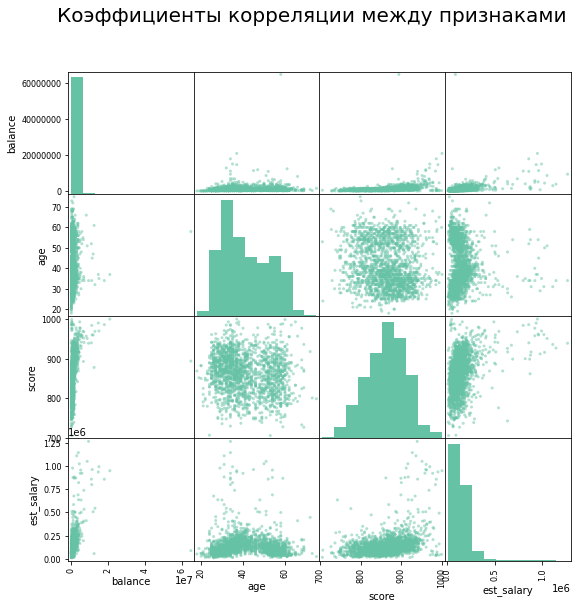

In [110]:
pd.plotting.scatter_matrix(churn_group, figsize=(9,9))
plt.suptitle('Коэффициенты корреляции между признаками', fontsize=20)
plt.show()

In [111]:
churn_group.corr()

,balance,age,score,est_salary
balance,1.000000,0.076506,0.322024,0.418705
age,0.076506,1.000000,-0.143245,-0.029901
score,0.322024,-0.143245,1.000000,0.354563
est_salary,0.418705,-0.029901,0.354563,1.000000


Во многом связи примерно одинаково описаны с помощью разных анализов, но при расчете коэффициента Пирсона выделяется очень слабая **обратная** связь между баллами крединого рейтинга и возрастом, и между оценочным доходом с возрастом. Эти же показатели при анализе phik показывают среднюю связь.

Рассчитаем коэффициенты корреляции для показателя оттока по всей таблице.

In [112]:
new_df_corr = new_df.drop(['balance_is_null', 'user_id'], axis=1)

In [113]:
corr_full = new_df_corr.phik_matrix(interval_cols=['balance', 'est_salary'])
corr_full

,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,rostov,rybinsk,yaroslavl,gender_nums
score,1.000000,0.118805,0.087247,0.000000,0.489611,0.534964,0.374847,0.166836,0.000000,0.554730,0.199809,0.051264,0.040390,0.120170,0.087247
city,0.118805,1.000000,0.011849,0.132277,0.062574,0.039931,0.125263,0.074611,0.030504,0.170837,0.016674,1.000000,1.000000,1.000000,0.011849
gender,0.087247,0.011849,1.000000,0.286591,0.063504,0.045434,0.071728,0.195636,0.012997,0.144090,0.220117,0.016351,0.017106,0.033881,1.000000
age,0.000000,0.132277,0.286591,1.000000,0.000000,0.000000,0.151041,0.151877,0.074331,0.333594,0.199158,0.086662,0.050159,0.102359,0.286591
equity,0.489611,0.062574,0.063504,0.000000,1.000000,0.000000,0.583305,0.221400,0.051124,0.285537,0.352114,0.064429,0.000000,0.054909,0.063504
balance,0.534964,0.039931,0.045434,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.374367,0.024672,0.000000,0.023165,0.047918,0.045434
products,0.374847,0.125263,0.071728,0.151041,0.583305,0.000000,1.000000,0.271043,0.112814,0.222246,0.259842,0.044941,0.085278,0.108354,0.071728
credit_card,0.166836,0.074611,0.195636,0.151877,0.221400,0.000000,0.271043,1.000000,0.049567,0.038332,0.201963,0.152176,0.076703,0.178279,0.195636
last_activity,0.000000,0.030504,0.012997,0.074331,0.051124,0.000000,0.112814,0.049567,1.000000,0.044890,0.262573,0.000000,0.074426,0.074964,0.012997
est_salary,0.554730,0.170837,0.144090,0.333594,0.285537,0.374367,0.222246,0.038332,0.044890,1.000000,0.048961,0.135878,0.101156,0.175427,0.144090


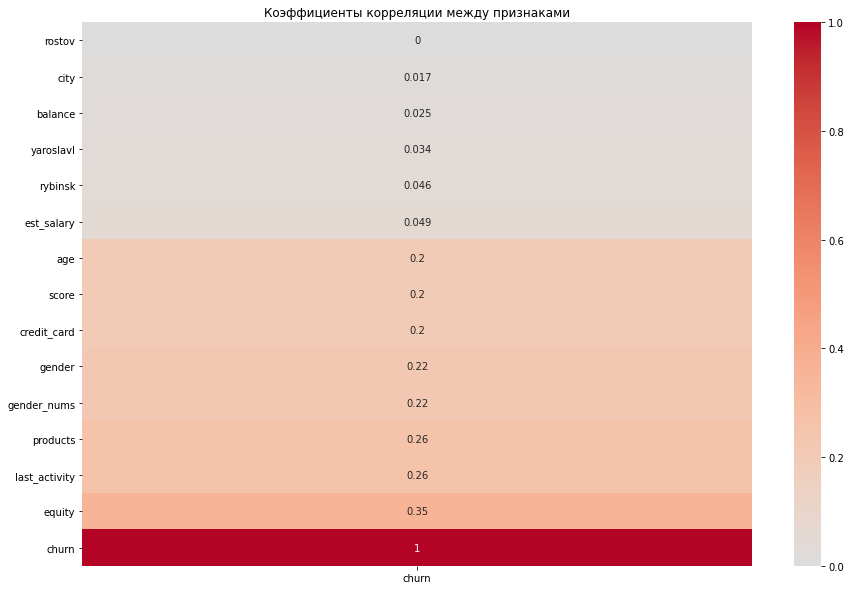

In [114]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_full.loc[:,['churn']].sort_values('churn'),
           cmap='coolwarm',
           vmax=1,
           annot=True,
           center=0)
plt.title('Коэффициенты корреляции между признаками')
plt.show()

Больше всего на отток влияют баланс на счете, кол-во объектов собственности, активность клиента и кол-во используемых продуктов. В частности, кол-во баллов собственности - слабая связь, возраст, кредитный рейтинг, наличие кредитной карты, пол, кол-во используемых продуктов, активность - очень слабая связь. Характер связи не определен.

### Статистический анализ

Проверка гипотез:
- различия дохода между теми клиентами, которые ушли и теми, которые остались;
- различия баллов кредитного скоринга между теми клиентами, которые ушли и теми, которые остались;
- доля пользователей, пользующихся кредитной картой в группе оттока не равна доле пользователей, пользующихся кредитной картой в группе желающих остаться в банке.

- различия дохода между теми клиентами, которые ушли и теми, которые остались;

Н0: оценочный доход между клиентами, которые ушли, и клиентами, которые остались, равны

Н1: оценочный доход между клиентами, которые ушли, и клиентами, которые остались, не равны

In [115]:
sample_1 = new_df.loc[new_df['churn'] == 0]['est_salary']
sample_2 = new_df.loc[new_df['churn'] == 1]['est_salary']

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(sample_1, sample_2)
p_value = results.pvalue
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    

p-значение: 0.8500882387258035
Не получилось отвергнуть нулевую гипотезу


В ходе проверки гипотезы, мы отвергли альтернативную гипотезу о неравенстве оценочного дохода  двух групп с помощью т-теста. Раннее,  в исследовательском анализе мы увидели относительную разницу средних в 0.46%. 

Поскольку в распределениях присутствуют выбросы и при анализе группы оттока распределение оценочного дохода было немного скошено вправо, поэтому попробуем также проверить данную гипотезу тестом Манна-Уитни.

In [116]:
sample_1 = new_df.loc[new_df['churn'] == 0]['est_salary']
sample_2 = new_df.loc[new_df['churn'] == 1]['est_salary']

alpha = 0.05  # критический уровень статистической значимости

results = st.mannwhitneyu(sample_1, sample_2)

print('p-значение: ', results.pvalue)
p_value = results.pvalue

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    )

p-значение:  0.00016830729188229058
Отвергаем нулевую гипотезу: разница статистически значима


При проверки гипотезы методом Манна-Уитни, разница считается значимой, нулевая гипотеза о равенстве средний в выборках отвергается.
При выделении сегментов далее необходимо проверять, как будет меняться % оттока добавлении признака оценочного дохода.

- различия баллов кредитного скоринга между теми клиентами, которые ушли и теми, которые остались

Н0: баллы кредитного скоринга между клиентами, которые ушли, и клиентами, которые остались, равны

Н1: баллы кредитного скоринга между клиентами, которые ушли, и клиентами, которые остались, не равны

In [117]:
sample_1 = new_df.loc[new_df['churn'] == 0]['score']
sample_2 = new_df.loc[new_df['churn'] == 1]['score']

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(sample_1, sample_2)

print('p-значение:', results.pvalue)
p_value = results.pvalue

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.3562886531110081e-26
Отвергаем нулевую гипотезу


В ходе проверки гипотезы, мы отвергли нулевую гипотезу о равенстве  баллов кредитного скоринга двух групп с помощью т-теста. Раннее,  в исследовательском анализе мы увидели относительную разницу средних в 2%. 

Поскольку распределение также было немного скошено влево, проведем дополнительно тест Манна-Уитни.

In [118]:
sample_1 = new_df.loc[new_df['churn'] == 0]['score']
sample_2 = new_df.loc[new_df['churn'] == 1]['score']

alpha = 0.05  # критический уровень статистической значимости

results = st.mannwhitneyu(sample_1, sample_2)

print('p-значение: ', results.pvalue)
p_value = results.pvalue

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    )

p-значение:  4.508763537702903e-22
Отвергаем нулевую гипотезу: разница статистически значима


Результаты обоих тестов опровергают нулевую гипотезу, есть основания утверждать о разнице в баллах кредитного скоринга между группами.

- доля пользователей, пользующихся кредитной картой в группе оттока не равна доле пользователей, пользующихся кредитной картой в группе желающих остаться в банке.

H0: доля пользователей, пользующихся кредитной картой в группе оттока равна доле пользователей, пользующихся кредитной картой в группе желающих остаться в банке.

H1: доля пользователей, пользующихся кредитной картой в группе оттока не равна доле пользователей, пользующихся кредитной картой в группе желающих остаться в банке.

In [119]:
cards_for_ztest = new_df.pivot_table(index='credit_card', values='user_id', columns='churn', margins=True, aggfunc='count')
cards_for_ztest = cards_for_ztest[[0,1]]
cards_for_ztest = cards_for_ztest.T    
cards_for_ztest.columns = ['no_cards', 'cards', 'all']
cards_for_ztest = cards_for_ztest.reset_index()
cards_for_ztest

,churn,no_cards,cards,all
0,0,2374,5781,8155
1,1,815,1003,1818


In [120]:
alpha = .05 # критический уровень статистической значимости

successes = list(cards_for_ztest['cards'])
trials = list(cards_for_ztest['all'])

# пропорция успехов в первой группе:
p1 = successes[0]/trials[0]

# пропорция успехов во второй группе:
p2 = successes[1]/trials[1]

# пропорция успехов в комбинированном датасете:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# разница пропорций в датасетах
difference = p1 - p2

In [121]:
# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1) 
p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    )

p-значение:  0.0
Отвергаем нулевую гипотезу: между долями есть значимая разница


По результатам тестирования мы отвергли нулевые гипотезы о равенстве долей пользователей, пользующихся кредитными картами и о равенстве средних баллов кредитного рейтинга. Гипотеза о равенстве средних оценочного дохода в выборках дала разные ответы при тестировании т-тестом и тестом Манна-Уитни. Необходимо при выделении сегментов, проверять, будет ли увеличиваться отток.

### Промежуточные итоги

Было предоставлено 10000 строк данных о пользователях банка для анализа клиентов. Из этих данных примерно 18% клиентов готовы покинуть банк.

В ходе исследовательского анализа были сформированы следующие портреты клиентов:

1. Неотточные клиенты:

- средний возраст 43 года;
- баланс на счете около 475000;
- с вероятностью 70% пользуется кредитной картой;
- доход около 118000;
- кол-во баллов собственности на уровне 3;
- примерно 47/53 может быть мужчиной или женщиной;
- кол-во исплользуемых продуктов на уровне 2;
- кредитный рейтинг в среднем 848 баллов;
- с 58% вероятностью из Ярославля, 27% из Рыбинска, 15% из Ростова.

2. Отточные клиенты:

- средний возраст около 40 лет;
- баланс на счете от 750000;
- с вероятностью 55% пользуется кредитной картой;
- доход около 125000;
- кол-во баллов собственности на уровне 4;
- примерно 65/35 может быть мужчиной или женщиной;
- кол-во исплользуемых продуктов на уровне 2;
- кредитный рейтинг в среднем 866 баллов;
- с 62% вероятностью из Ярославля, 24% из Рыбинска, 14% из Ростова;
- с 70% вероятностью активный клиент.


Были выявлены основные признаки оттока:

- возраст в промежутках 25-38 и 50-61 лет;
- баллы кредитного рейтинга в промежутках 845-905 и 920-940;
- кол-во используемых продуктов свыше 2;
- кол-во баллов объектов собственности свыше или равно 5;
- преимущественно мужчины;
- активные клиенты;
- баланс от 750000

При анализе корреляции были выявлены следующие связи:

- очень высокая связь: кредитный рейтинг и баланс;
- высокая связь: кредитный рейтинг и доход, баланс и доход;
- средняя связь  между показателями баллов кредитного рейтинга с количеством баллов собственности, возрастом. 

В целом, на показатель оттока больше всего влияют баланс на счете, кол-во объектов собственности, активность клиента и кол-во используемых продуктов.

При статистическом анализе были опровергнуты нулевые гипотезы о равенстве дохода между теми клиентами, которые ушли и теми, которые остались, равенстве долей пользователей, пользующихся кредитной картой в группе оттока и  пользующихся кредитной картой в группе желающих остаться в банке. Гипотеза о равенстве оценочного дохода при разных способах тестирования показала разные результаты.


### Сегментация

На основании исследовательского анализа, выявить наиболее явные признаки отточных клиентов и по ним выделить высокоотточные сегменты, посчитать размер сегмента и долю оттока в нем.  

**Сегмент 1**
- мужчины
- активный пользователь 
- кредитный рейтинг от 845 до 905 или 920-940
- кол-во используемых продуктов больше или равно 2

In [122]:
segment_1 =new_df.query('gender_nums == 1 and products >= 2 and last_activity == 1 and (845 <= score <= 905 or 920 <= score <= 940)').agg({"churn":["mean","sum","count"]})
segment_1

,churn
mean,0.636986
sum,372.000000
count,584.000000


**Сегмент 2**

- баланс от 750000
- нет кредитной карты
- кол-во баллов собственности больше или равно 5

In [123]:
segment_2 = new_df.query('(balance >= 750000 ) and  equity >=5  and credit_card == 0').agg({"churn":["mean","sum","count"]})
segment_2

,churn
mean,0.471326
sum,263.000000
count,558.000000


**Сегмент 3**
- баланс от 750000
- кредитный рейтинг от 845 до 905 или 920-940
- возраст в интервалах 25-38 лет или 50-61 лет

In [124]:
segment_3 = new_df.query('(balance >= 750000)  and (845 <= score <= 905 or 920 <= score <= 940) and (25 <= age <= 38  or 50 <= age <= 61)').agg({"churn":["mean","sum","count"]})
segment_3

,churn
mean,0.534038
sum,455.000000
count,852.000000


Проверим, какую долю отточных клиентов мы захватываем от всех отточных клиентов по банку.

In [125]:
segment_1_table = new_df.query('gender_nums == 1 and products >= 2 and last_activity == 1 and (845 <= score <= 905 or 920 <= score <= 940)')
segment_2_table = new_df.query('(balance >= 750000 ) and  equity >=5  and credit_card == 0')
segment_3_table = new_df.query('(balance >= 750000)  and (845 <= score <= 905 or 920 <= score <= 940) and (25 <= age <= 38  or 50 <= age <= 61)')

In [126]:
all_catched = pd.concat([segment_1_table, segment_2_table, segment_3_table])
all_catched

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_is_null,rostov,rybinsk,yaroslavl,gender_nums
47,201837,922,Ярославль,М,67,3,366599.61,2,1,1,246523.17,0,0,0,0,1,1
58,164676,860,Ярославль,М,37,5,648594.03,2,1,1,213586.86,1,0,0,0,1,1
72,156677,873,Ярославль,М,39,5,915959.85,3,0,1,154034.62,1,0,0,0,1,1
73,155403,859,Рыбинск,М,56,5,652553.80,2,1,1,60791.77,1,0,0,1,0,1
77,191976,937,Ярославль,М,33,5,2061152.96,2,1,1,280670.62,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9909,171011,885,Ярославль,М,35,5,1133520.90,2,0,0,175463.34,1,0,0,0,1,1
9933,197891,899,Ярославль,М,37,5,1422472.42,2,0,1,231978.68,1,0,0,0,1,1
9935,197240,899,Рыбинск,Ж,33,5,1137368.92,2,1,0,128681.09,0,0,0,1,0,0
9942,199340,890,Ярославль,М,61,4,1041694.29,2,1,1,132913.41,0,0,0,0,1,1


In [127]:
all_churn = new_df.churn.sum()
catched = all_catched.drop_duplicates().churn.sum()
share_catched = catched / all_churn
text_churn = f"{catched}/{all_churn} = {share_catched:.1%}"
if share_catched < 1/3:
        print(f"В сегменты попало недостаточное число отточных: {text_churn}")
else:
    print(text_churn)

735/1818 = 40.4%


### Выводы


По результатам исследования были выделены 3 сегмента клиентов банка, которые находятся в зоне риска.

1. Сегмент 1 ( мужчина, активный пользователь, кредитный рейтинг от 845 до 905 или 920-940, кол-во используемых продуктов больше 2)

Рекомендуемые мероприятия: 
- повышенный кешбек на мужские категории товаров (техника/заправки/спортивные товары)
- увеличение срока беспроцентного пользования кредитной картой;
- реферальная программа за привлечение других пользователей;


2. Сегмент 2 (баланс от 750000, нет кредитной карты, кол-во баллов собственности больше или равно 5)

Рекомендуемые мероприятия: 
- повышение % по вкладам/депозитам или создание более гибких условий (возможность съема/взноса денежных средств в течение всего периода вклада, автоматическая капитализация процентов, возможность закрытия вклада без потери % и пр.);
- повышенный кешбек на все покупки при тратах от какой-то суммы;
- возможность оказания премиальных услуг, как, например, вип-залы в аэропортах, консультация/доверительное управление инвестиционным брокерским счетом;
- увеличение лимитов переводов/снятия денежных средств при сохранении определенного уровня баланса.

3. Сегмент 3 (баланс от 750000, кредитный рейтинг от 845 до 905 или 920-940, возраст в интервалах 25-38 лет или 50-61 лет)

Рекомендуемые мероприятия: 
- реферальная программа за привлечение других пользователей;
- повышение % по вкладам/депозитам или создание более гибких условий (возможность съема/взноса денежных средств в течение всего периода вклада, автоматическая капитализация процентов, возможность закрытия вклада без потери % и пр.);
- увеличение срока беспроцентного пользования кредитной картой;
- легкое открытие кредитных линий без личного присутствия в банках;
- форма обратной связи от клиента с пожеланиями к услугам/качеству обслуживания;
- возможность получения акций/облигаций при открытии брокерского счета или определенном уровне денежных средств на брокерском счету.
